# Trabajo de Fundamentos Matemáticos

Se van a leer los puntos de forma antihorario

Importación de datos JSONs, los polígonos seleccionables son:

-elgindy-1.json

-gray-embroidery.json

-held-12.json

-held-7a.json

-held-7b.json

-held-7c.json

-held-7d.json

-mapbox-building.json

-matisse-nuit.json

-mei-3.json

-mei-5.json

-meisters-3.json

-seidel-3.json

-skimage-horse.json

-toussaint-1a.json

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [41]:
list_nombre = (['eberly-10', 'eberly-14', 'elgindy-1', 'gray-embroidery', 'held-1', 'held-3', 'held-12', 
               'held-7a','held-7b', 'held-7c', 'held-7d', 'mapbox-building', 'matisse-nuit', 
               'mapbox-dude', 'matisse-alga','matisse-blue', 'matisse-icarus', 'mei-2', 'mei-3',
               'mei-4', 'mei-5', 'mei-6', 'meisters-3','misc-discobolus', 'misc-fu', 'seidel-3', 
               'skimage-horse', 'toussaint-1a'])


## Clase polígono

La clase polígono contiene los métodos que se van utilizar para llevar a cabo las distintas partes del trabajo

In [42]:
class Poligono:
    def __init__(self,nombre):
        self.nombre = nombre
        f = open('imagen/json/'+nombre+'.json')
        self.vertices = json.load(f)
        self.n = len(self.vertices)
        self.nlen = len(self.vertices[0])
        self.x,self.y = np.array(self.vertices[0]).T
        f.close()
    def simple(self):
        if(self.n == 1):
            return self.n
    def plot(self):
        #Para representar el poligono completo se necesita incorporar los 2 puntos iniciales de ahí el append
        x,y = np.append(self.vertices[0],[self.vertices[0][0]],axis=0).T
        plt.plot(x,y,'o-')
    def _repr_png_(self):
        self.plot()
    def savefigura(self):
        self.plot()
        plt.savefig("resultados/parte1/"+str(self.nombre)+".png")
        plt.close()
    def __repr__(self):
        return f'Nombre del poligono: ' +self.nombre+ 'y 'f'{self.n}-agono de  vertices'
    #Parte 2
    def contiene(self,q):
        """
        Algoritmo de Raycasting para determinar si un punto está dentro del poligono.
        Utilizando un rayo horizontal hacia la derecha ------>
        :param q: el punto del poligono q[0] su coordenada...
        :return: 
        """
        x,y = q
        cruces = 0
        lugar = "fuera"
        dentro = False # primera iteraccion 0 
        #impar = False si hay 0 cruces cuenta como par para el algoritmo
        #Par = fuera || Impar = dentro

        vertices = np.array(self.vertices[0])

        #para cada arista del poligono
        for i in range(self.nlen):

            x1,y1 = vertices[i] #ultimo vertices
            x2,y2 = vertices[(i+1)%self.nlen]

            # Si y el punto esta entre la y1 e y2
            if((y > y1 and y < y2) or (y > y2 and y < y1)):
                #Si x1,x2 NO están a la izquierda del punto
                if (not(x1 < x and x2 < x)):
                    x_interseccion = (y - y1) * (x2 - x1) / (y2 - y1) + x1
                    if x < x_interseccion:
                        cruces += 1
                        dentro = not dentro

                    if(dentro):
                        lugar = "dentro"
                    else:
                        lugar = "fuera"

        return self.nombre,lugar
    
    #parte 3 Triangulación

    def convexa(self,punto_previo,punto_actual, punto_siguiente):
        convexa = True
        u = (punto_actual[0] - punto_previo[0],punto_actual[1] - punto_previo[1])
        v = (punto_siguiente[0] - punto_actual[0],punto_siguiente[1] - punto_actual[1])

        cross = u[0]*v[1]-u[1]*v[0]
           
        if(cross < 0):
            #No es convexa
            convexa = False
            #se pasa al siguiente punto

        else:
            #Es convexa pero hay que comprobar si tiene un punto interior
            convexa = True

        return convexa

    def orden_izquierda_abajo(self):
            nvertices = self.vertices[0]
            lista_ordenada = nvertices.copy()  
            x_actual,y_actual = nvertices[0]
            indice = 0
            for i in range(len(nvertices)):
                if(x_actual>nvertices[i][0]):
                    x_actual = nvertices[i][0]
                    y_actual = nvertices[i][1]
                    indice = i
                if(x_actual == nvertices[i][0]):
                    if(y_actual > nvertices[i][1]):
                        x_actual = nvertices[i][0]
                        y_actual = nvertices[i][1]
                        indice = i
            if(indice != 0):
                lista_ordenada = np.append(nvertices[indice:],nvertices[:indice],axis = 0).tolist()    
    
            return lista_ordenada

    def triangulacion(self):
        """
        Algoritmo EarClipping para triangulación de polígonos simples.
        :return: Lista de triángulos, cada triángulo es una tupla de índices de vértices.
        """

        triangulos = []

        lista_ordenada = self.orden_izquierda_abajo()

        def punto_dentro_triangulo(p, v1, v2, v3):
            """
            Verifica si un punto p se encuentra dentro del triángulo formado por los vértices v1, v2 y v3.
            """
            # Calcular el área del triángulo original
            area_original = abs((v2[0]-v1[0])*(v3[1]-v1[1]) - (v3[0]-v1[0])*(v2[1]-v1[1]))

            # Calcular las áreas de los triángulos formados por el punto y cada par de vértices del triángulo original
            area1 = abs((v1[0]-p[0])*(v2[1]-p[1]) - (v2[0]-p[0])*(v1[1]-p[1]))
            area2 = abs((v2[0]-p[0])*(v3[1]-p[1]) - (v3[0]-p[0])*(v2[1]-p[1]))
            area3 = abs((v3[0]-p[0])*(v1[1]-p[1]) - (v1[0]-p[0])*(v3[1]-p[1]))

            # Verificar si la suma de las áreas de los triángulos formados por el punto es igual al área del triángulo original
            return (area1 + area2 + area3 - area_original) <= 0

        while len(lista_ordenada) >= 3:
            #Se busca el siguiente triángulo de la triangulación
            for i in range(len(lista_ordenada)):
                v1 = lista_ordenada[(i-1)%len(lista_ordenada)]
                v2 = lista_ordenada[i]
                v3 = lista_ordenada[(i+1)%len(lista_ordenada)]

            # se comprueba si el ángulo formado por los tres vértices es convexo.
                if (self.convexa(v1,v2,v3)):
                    punto_interior = False
                    # Comprobamos si hay algun vertice interior
                    for j in range(len(lista_ordenada)):
                        if j not in [ (i-1)%len(lista_ordenada),i, (i+1)%len(lista_ordenada)]:
                            p = lista_ordenada[j]      
                            if (punto_dentro_triangulo(p,v1,v2,v3)):
                                punto_interior = True
                                #Si hay punto interior se pasa al siguiente punto
                                break
                    #Si no hay punto interior se añade a la lista de triangulos que forman el poligono
                    if not punto_interior:
                        triangulos.append([v1, v2, v3])
                        # se elimina el vertice para continuar con la triangulacion
                        lista_ordenada.pop(i)
                        break
        return triangulos
    
    def plot_triangulos(self, lista_triangulos):
        
        fig, ax = plt.subplots()
        for triangulo in lista_triangulos:
            ax.fill(np.array(triangulo)[:,0], np.array(triangulo)[:,1])

        plt.savefig("resultados/parte3/"+str(self.nombre)+".png")
        #plt.close()
            

    #Parte 4 Área de los polígonos
    
    def area(self,triangulos):
            
            area_total = 0

            for triangulo in triangulos:
                v1, v2, v3 = triangulo

                area_total += abs((v2[0]-v1[0])*(v3[1]-v1[1]) - (v3[0]-v1[0])*(v2[1]-v1[1]))/2

            return area_total
    
    #Parte 5a Envolvente convexa Jarvis

    def envolvente_convexa_jarvis(self):

        lista_ordenada = self.orden_izquierda_abajo()

        n = len(lista_ordenada)
        
        # Se elige el primer punto más a la izquierda
        p0 = 0
        envolvente = []

        punto_actual = p0
        while True:
            envolvente.append(lista_ordenada[punto_actual])
            punto_siguiente = (punto_actual + 1) % n
            
            for i in range(len(lista_ordenada)):
                if self.orientacion(lista_ordenada[punto_actual], lista_ordenada[i], lista_ordenada[punto_siguiente]) == 2:
                    punto_siguiente = i
            
            punto_actual = punto_siguiente
            if punto_actual == p0:
                break
        
        return envolvente
    
    def orientacion(self, p, q, r):
        valor = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if valor == 0: #puntos colineales
            return 0
        elif valor > 0: #puntos en sentido horario //al revés
            return 1
        else:
            return 2 #puntos en sentido antihorario
        
    def dibujar_envolvente_jarvis(self):
        lista_ordenada = self.orden_izquierda_abajo()
        envolventes = self.envolvente_convexa_jarvis()

        x = [envolvente[0] for envolvente in envolventes]
        y = [envolvente[1] for envolvente in envolventes]

        x.append(envolventes[0][0])
        y.append(envolventes[0][1])


        x_coords = [coord[0] for coord in lista_ordenada]
        y_coords = [coord[1] for coord in lista_ordenada]

        x_coords.append(lista_ordenada[0][0])
        y_coords.append(lista_ordenada[0][1])

        # Añadir el primer vértice al final para cerrar el polígono
        envolventes.append(envolventes[0])
        
        # Dibujar el polígono y la envolvente
        plt.plot(x_coords, y_coords)
        plt.plot(x, y, 'r--')
        plt.savefig("resultados/parte5a/"+str(self.nombre)+".png")
        plt.show()


    # #Parte 5b Envolvente convexa Graham

    # def graham_scan(self):
    #     # Ordenar los puntos en sentido antihorario
    #     sorted_points = sorted(self.vertices[0], key=lambda p: (p[1], p[0]))
        
    #     # Lista L que contiene los vértices en sentido antihorario de los puntos de la envolvente convexa
    #     listL = []
        
    #     # Realizar el algoritmo de Graham scan
    #     for p in sorted_points:
    #         while len(listL) > 1 and self.orientacion(listL[-2], listL[-1], p) <= 0:
    #             listL.pop()
    #         listL.append(p)
        
    #     return listL
    
    # def envolvente_convexa_graham(self):
    #     envolventes = self.graham_scan()
    #     return envolventes
    
    # def dibujar_envolvente_graham(self):
    #     envolventes = self.envolvente_convexa_graham()

    #     x_coords = [coord[0] for coord in self.vertices[0]]
    #     y_coords = [coord[1] for coord in self.vertices[0]]

    #     x_coords.append(self.vertices[0][0][0])
    #     y_coords.append(self.vertices[0][0][1])

    #     x = [punto[0] for punto in envolventes]
    #     y = [punto[1] for punto in envolventes]

    #     plt.plot(x_coords, y_coords)
    #     plt.plot(x, y, 'r--')
    #     plt.scatter(x, y, color='red')
    #     plt.savefig("resultados/parte5b/" + str(self.nombre) + ".png")
    #     plt.show()

## Parte 1

Se ha implementado la clase poligono en la que se ha comprobado si el polígono es simple sin agujeros y se genera una instancia de la clase en lista_poligonos para todos los polígonos que cumplen con las características gracias al método **simple**.

Asicomo la representación de los polígonos gracias al método **savefigura**.


In [43]:
lista_poligonos = []

for i in range(len(list_nombre)):
    poligono = Poligono(list_nombre[i])
    nivel = poligono.simple()
    if(nivel == 1):
        lista_poligonos.append(poligono)
        poligono.savefigura()

# for i in range(len(lista_poligonos)):
#     plt.figure()
#     print(lista_poligonos[i].nombre)
#     lista_poligonos[i].plot()

## Parte  2 Punto en Polígono

Método que reciba un punto y determine si está contenido o no en el polígono utilizando Raycasting (Par-Impar) gracias al método **contiene** y que depende del número de veces que pasa la línea horizontal por el polígono. Se localiza el punto (400,400). Hay que tener en cuenta que no se han contemplado casos específicos como pueden ser puntos que se encuentren en la líneas que forman el polígono y se ha tomado como 'dentro' por simplicidad.

('elgindy-1', 'dentro')
('gray-embroidery', 'dentro')
('held-12', 'dentro')
('held-7a', 'dentro')
('held-7b', 'fuera')
('held-7c', 'fuera')
('held-7d', 'dentro')
('mapbox-building', 'fuera')
('matisse-nuit', 'dentro')
('mei-3', 'dentro')
('mei-5', 'fuera')
('meisters-3', 'fuera')
('seidel-3', 'dentro')
('skimage-horse', 'dentro')
('toussaint-1a', 'dentro')


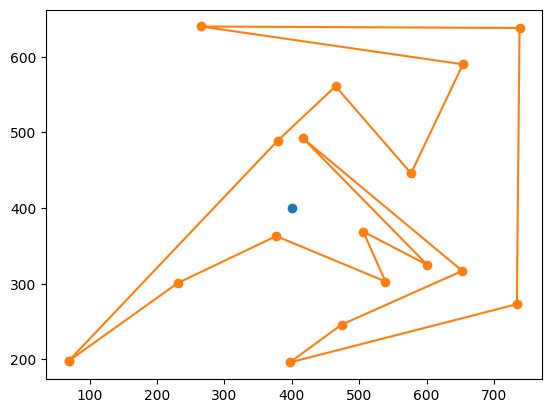

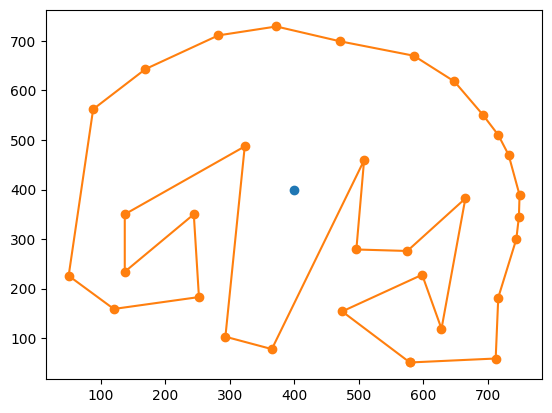

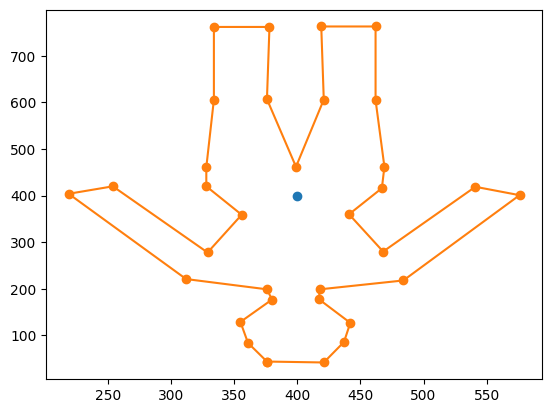

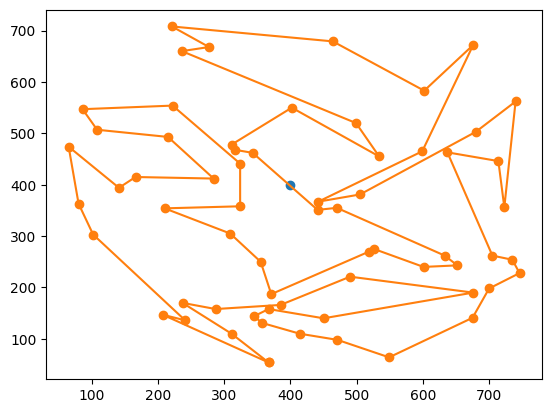

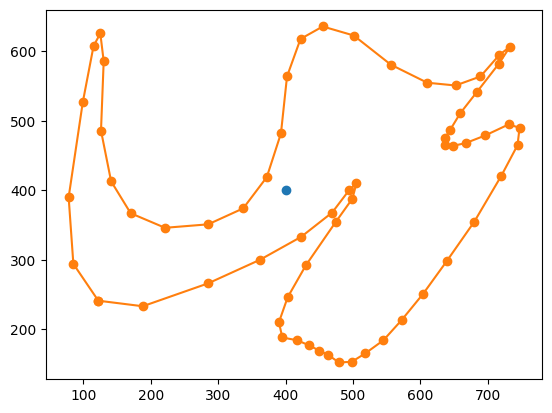

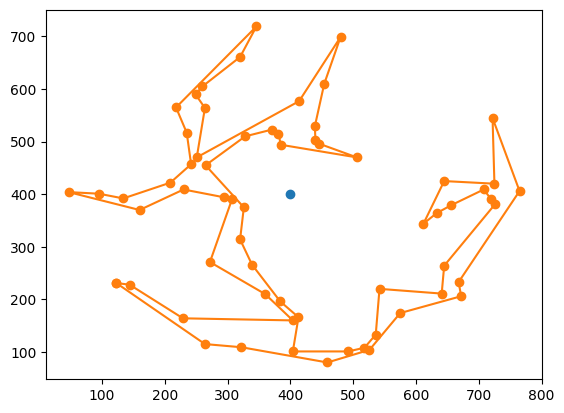

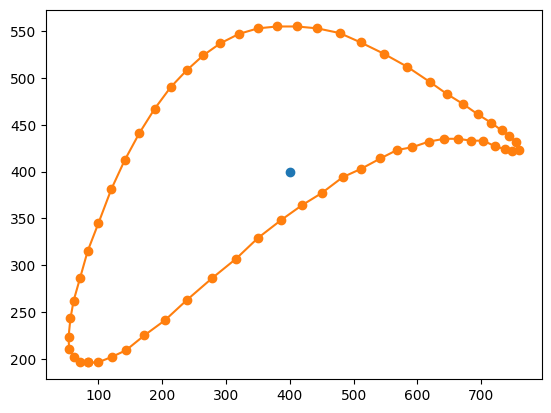

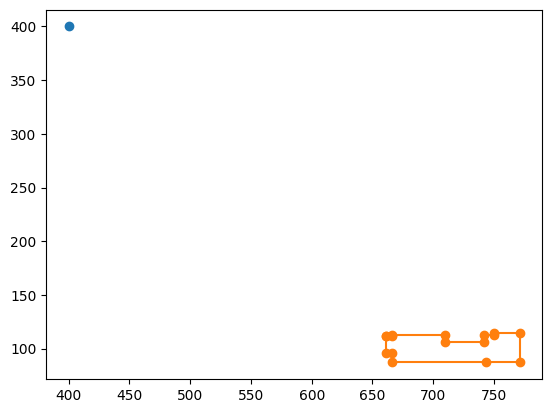

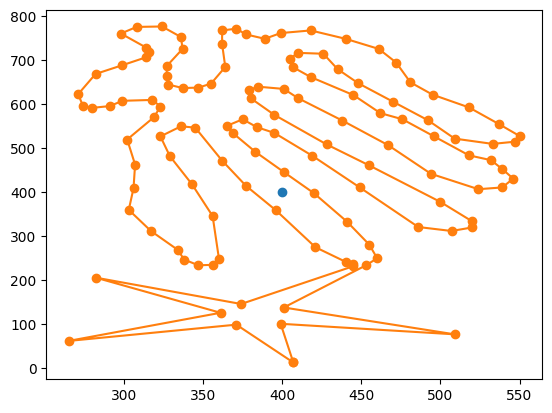

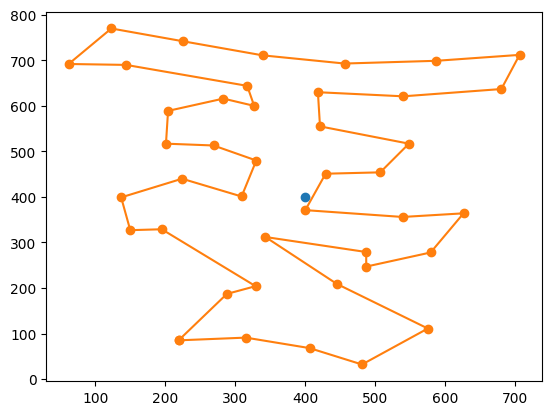

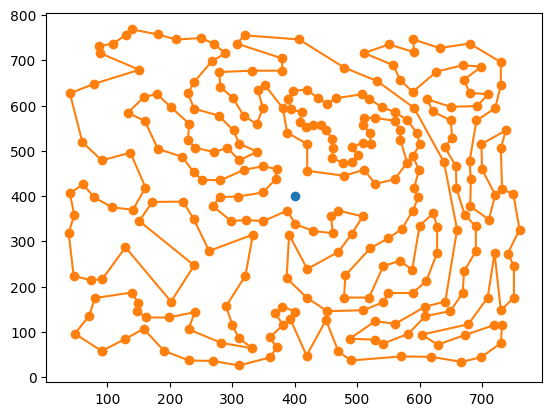

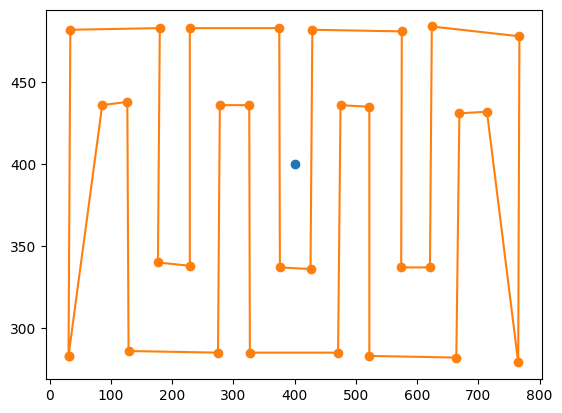

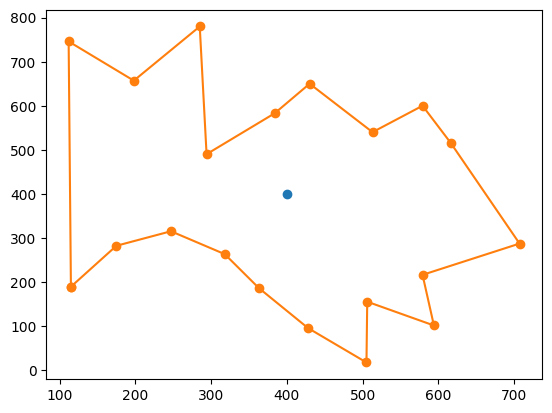

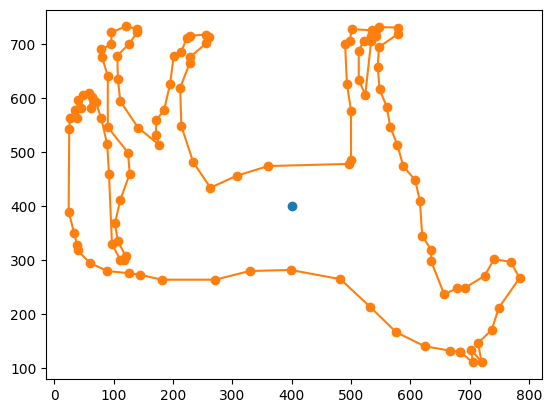

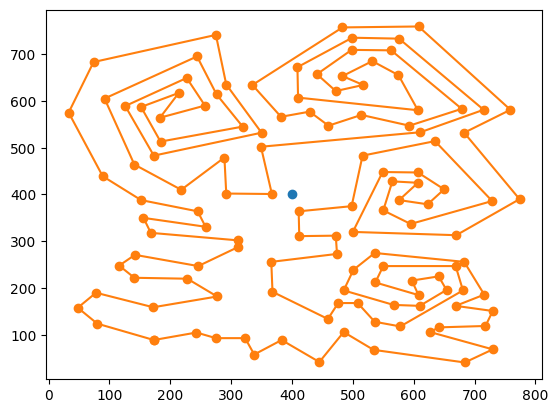

In [44]:
lista_resultado = []

for i in range(len(lista_poligonos)):
    resultado = lista_poligonos[i].contiene([400,400])
    lista_resultado.append(resultado)

for i in range(len(lista_poligonos)):
    plt.figure()
    plt.plot(400,400,'o')
    lista_poligonos[i].plot()
    

for i in range(len(lista_resultado)):
    print(lista_resultado[i])

## Parte 3 Triangulación

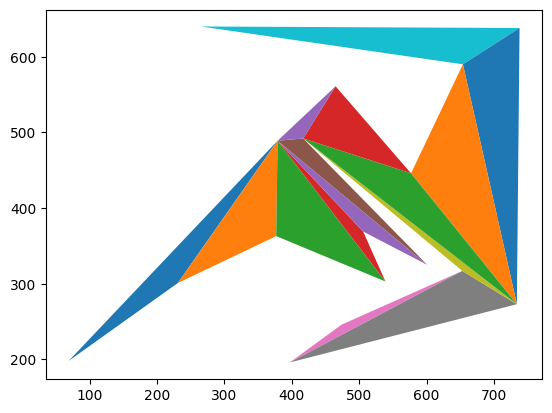

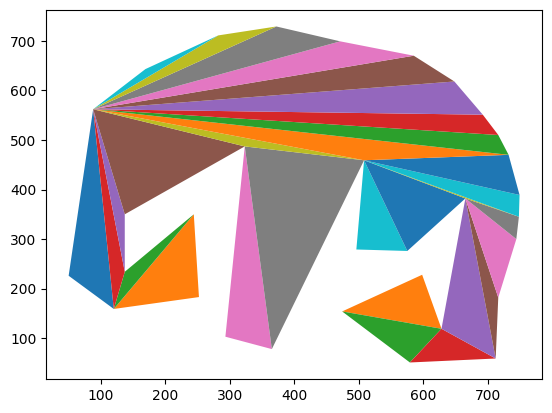

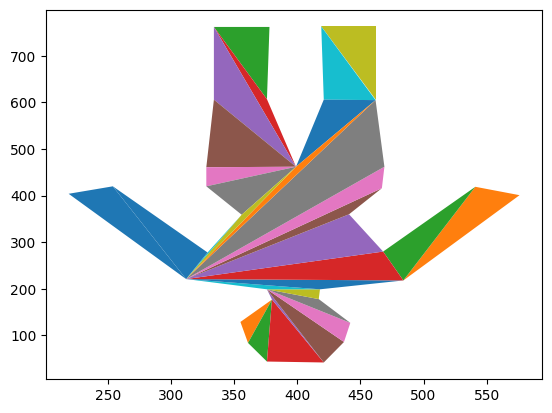

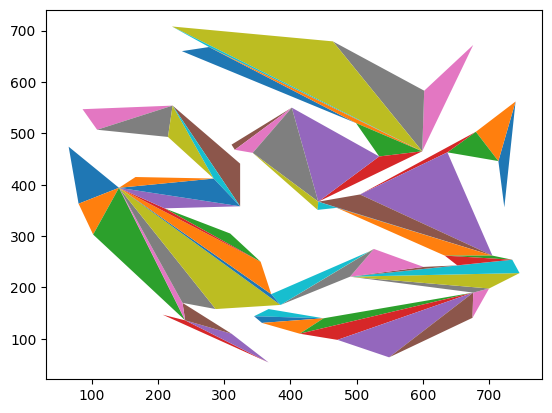

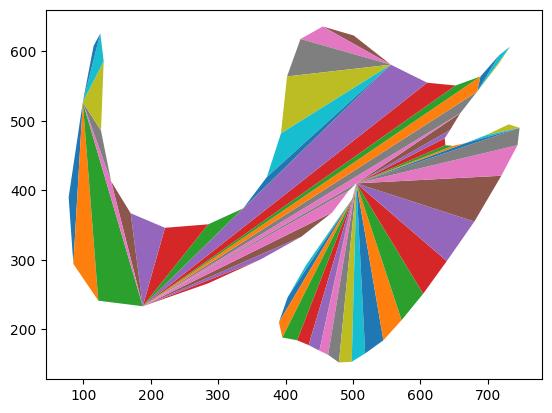

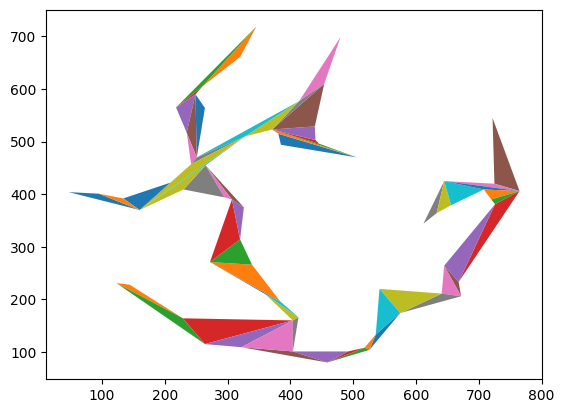

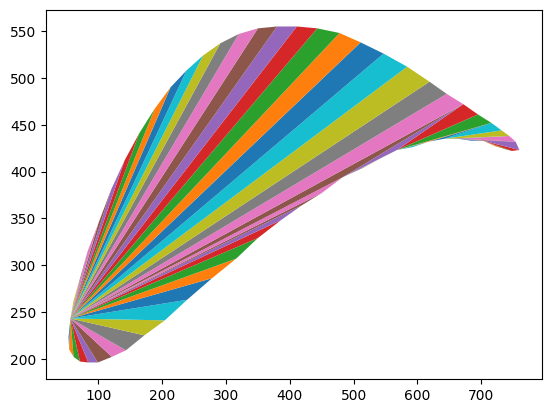

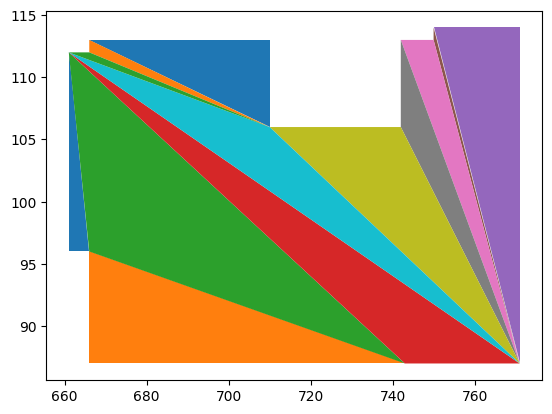

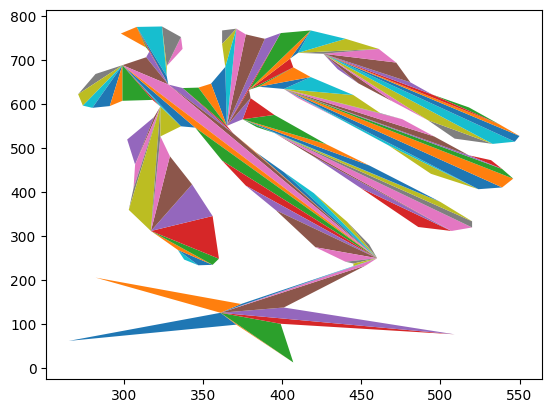

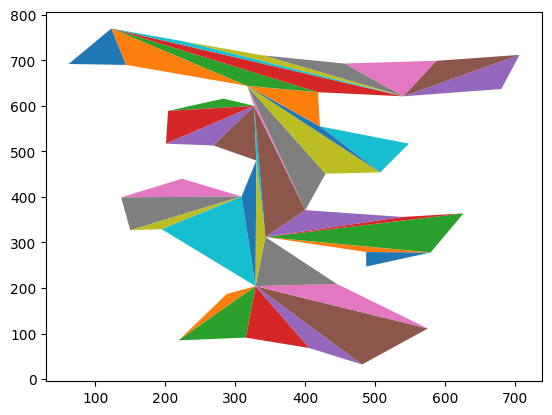

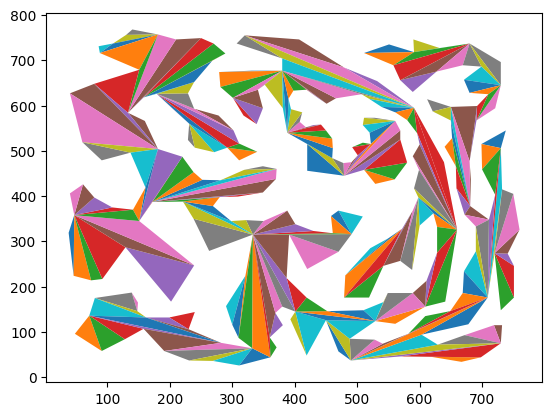

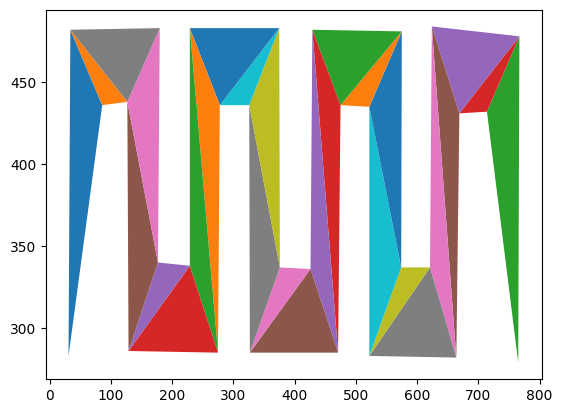

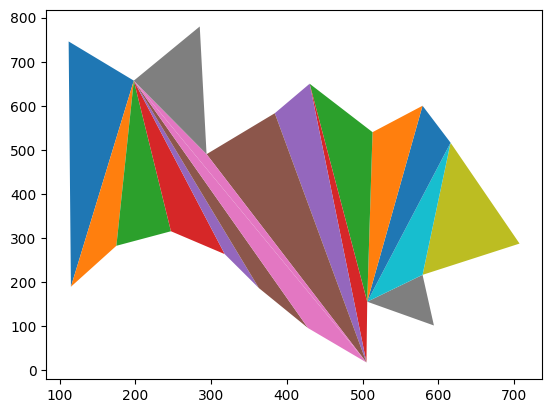

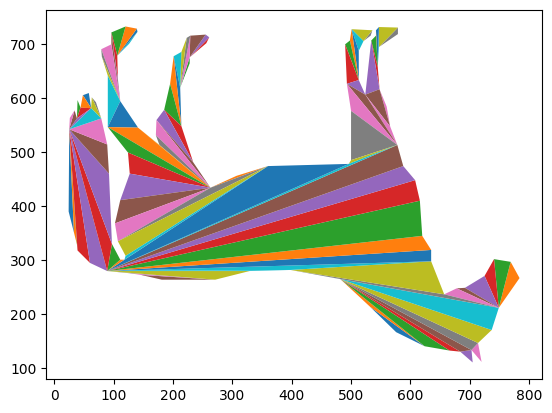

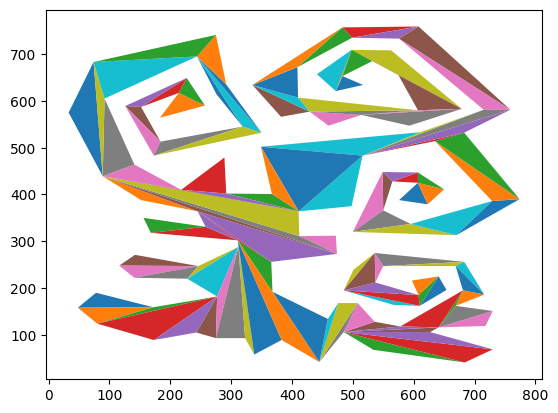

In [45]:
for i in range(len(lista_poligonos)):
    triangulos = lista_poligonos[i].triangulacion()
    lista_poligonos[i].plot_triangulos(triangulos)

## Parte 4 Cálculo del área

In [46]:
for i in range(len(lista_poligonos)):
    triangulos = lista_poligonos[i].triangulacion()
    area=lista_poligonos[i].area(triangulos)
    print("Nombre: "+lista_poligonos[i].nombre+" area del triangulo: "+str(area) )

Nombre: elgindy-1 area del triangulo: 112470.0
Nombre: gray-embroidery area del triangulo: 295473.0
Nombre: held-12 area del triangulo: 87271.0
Nombre: held-7a area del triangulo: 202986.5
Nombre: held-7b area del triangulo: 149592.0
Nombre: held-7c area del triangulo: 58354.5
Nombre: held-7d area del triangulo: 105929.0
Nombre: mapbox-building area del triangulo: 2607.0
Nombre: matisse-nuit area del triangulo: 73799.5
Nombre: mei-3 area del triangulo: 180013.5
Nombre: mei-5 area del triangulo: 270894.0
Nombre: meisters-3 area del triangulo: 87090.0
Nombre: seidel-3 area del triangulo: 227130.0
Nombre: skimage-horse area del triangulo: 180144.0
Nombre: toussaint-1a area del triangulo: 238110.0


## Parte 5 Envolvente convexa-Jarvis

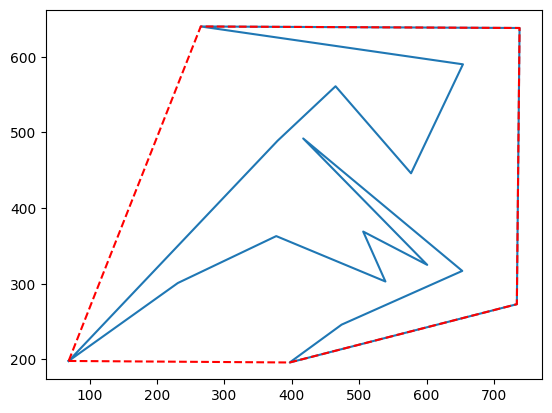

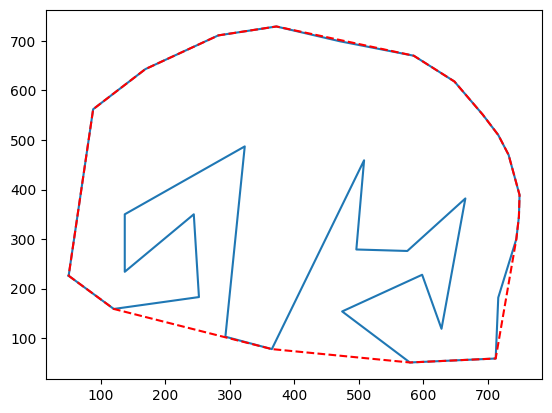

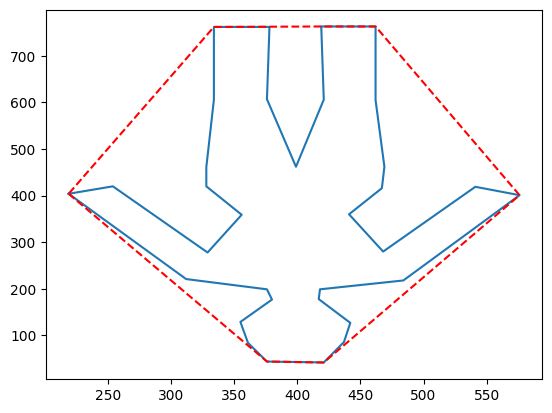

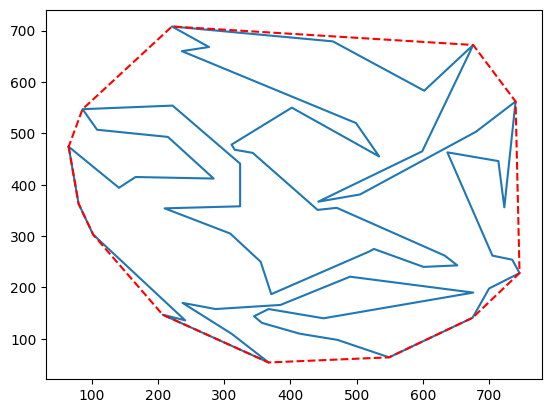

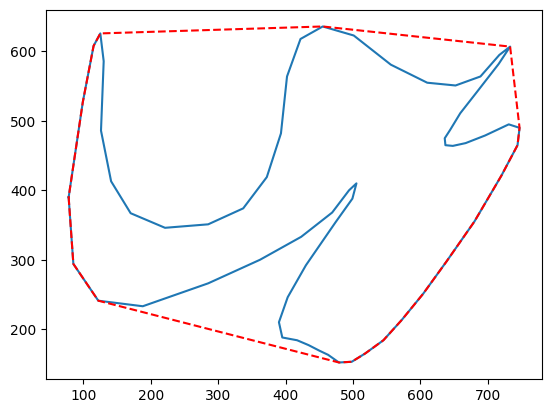

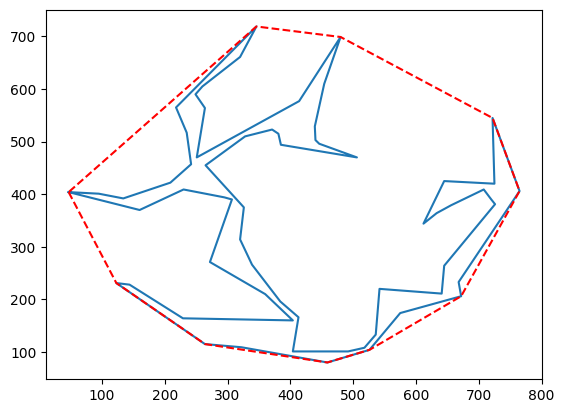

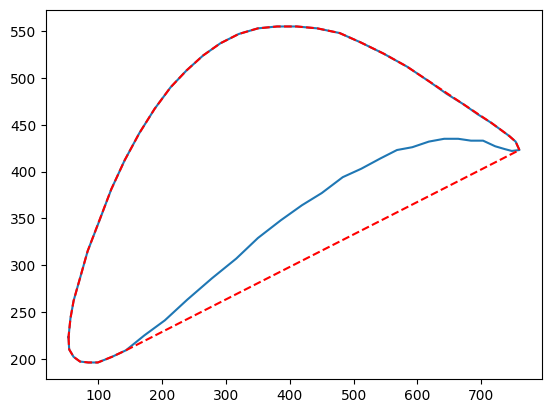

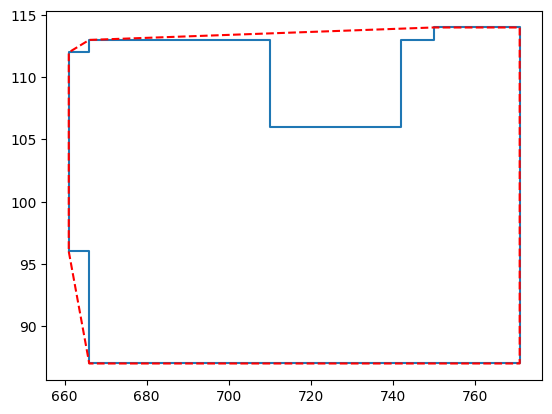

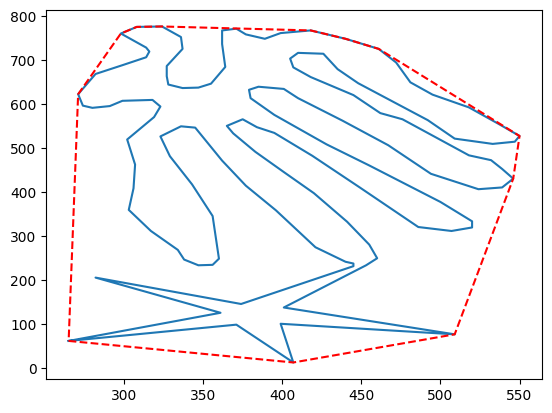

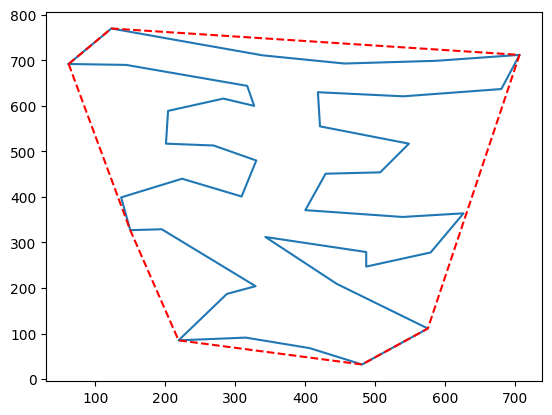

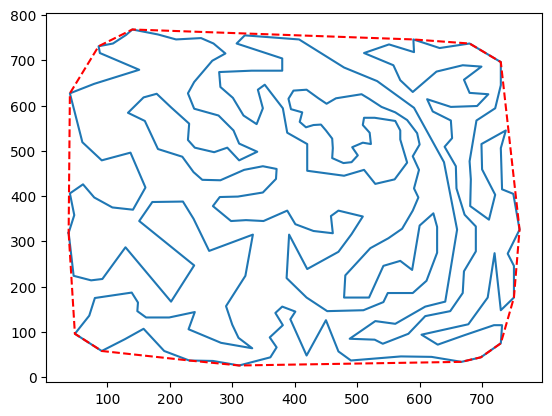

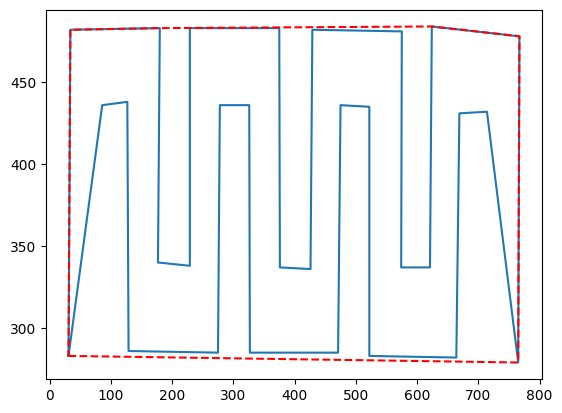

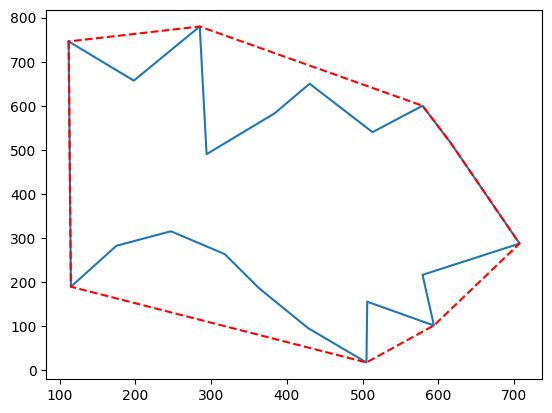

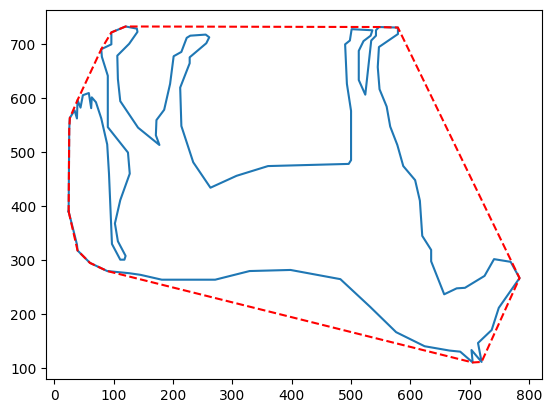

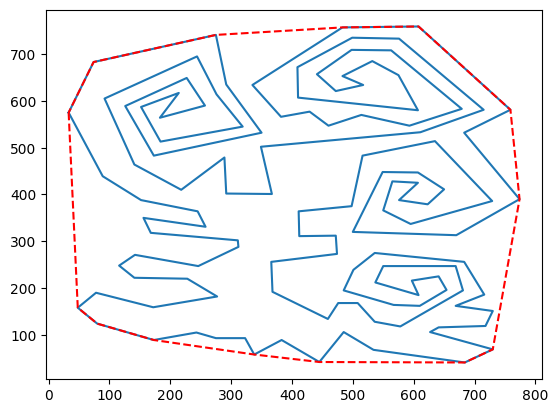

In [47]:
for i in range(len(lista_poligonos)):
    lista_poligonos[i].dibujar_envolvente_jarvis()

## Parte 5 Envolvente convexa-Graham

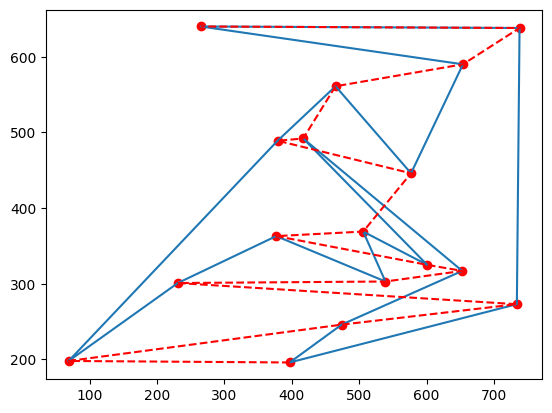

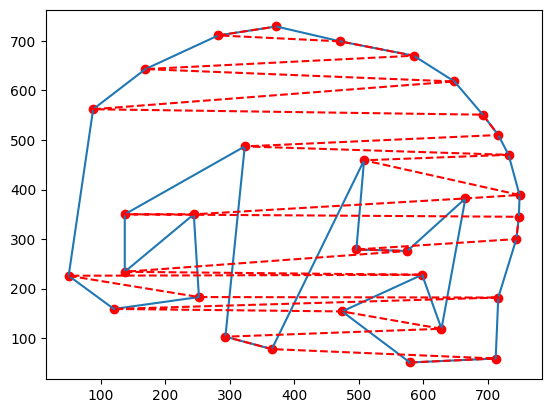

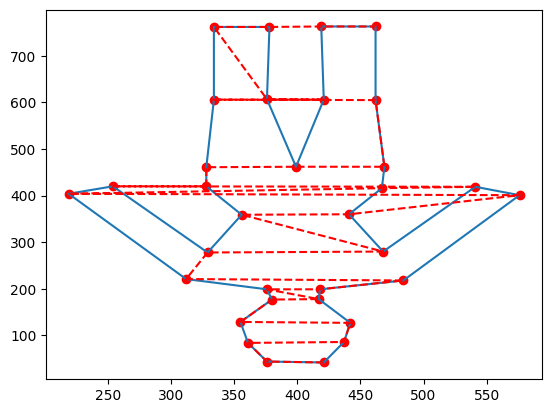

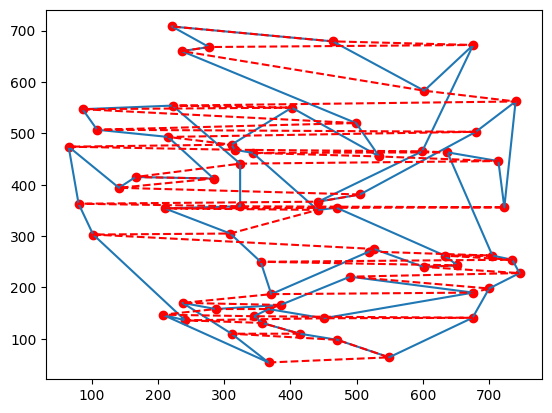

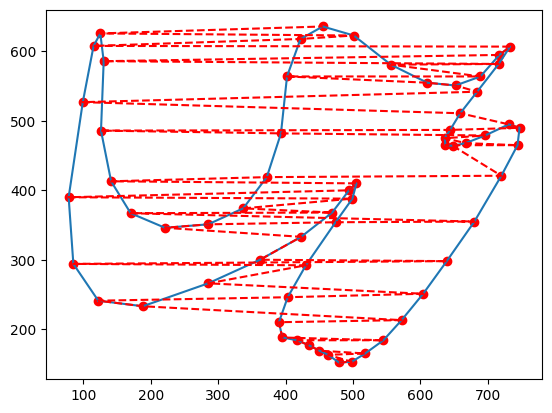

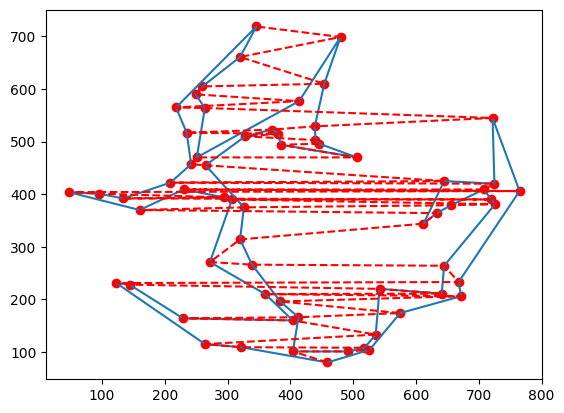

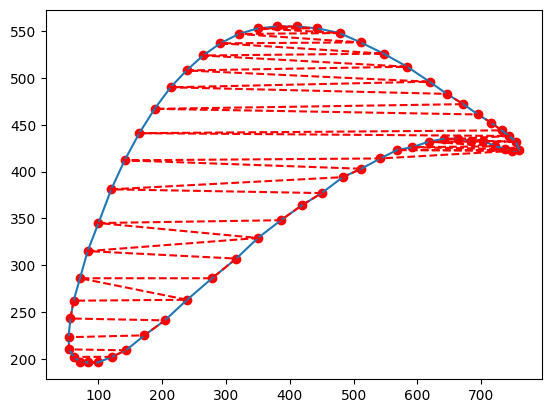

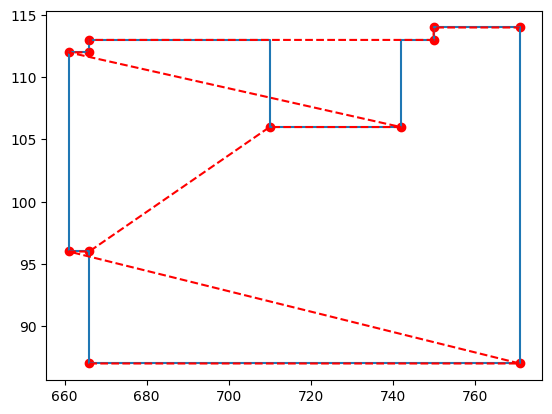

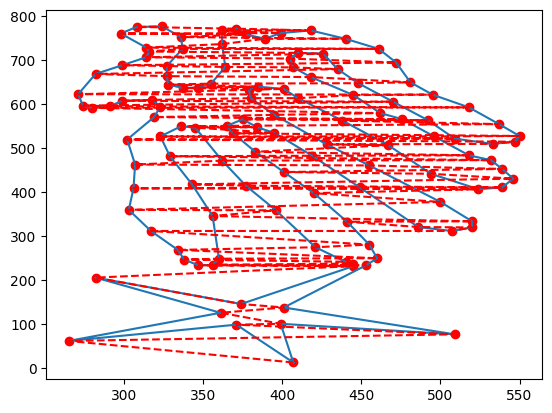

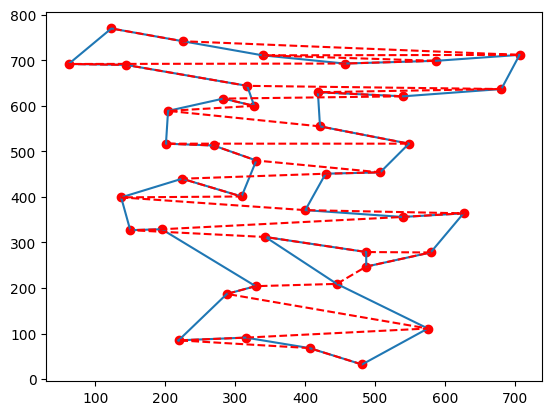

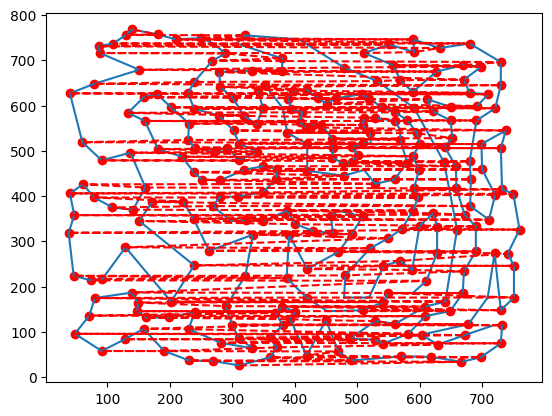

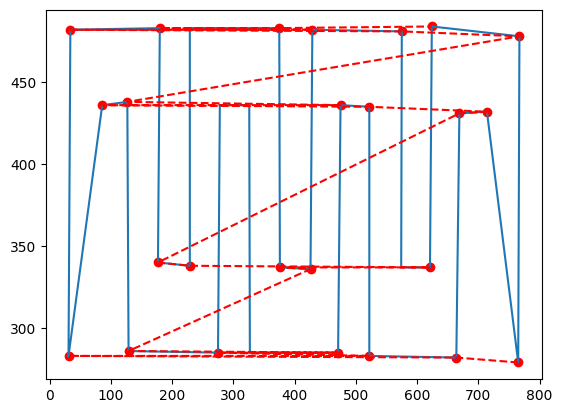

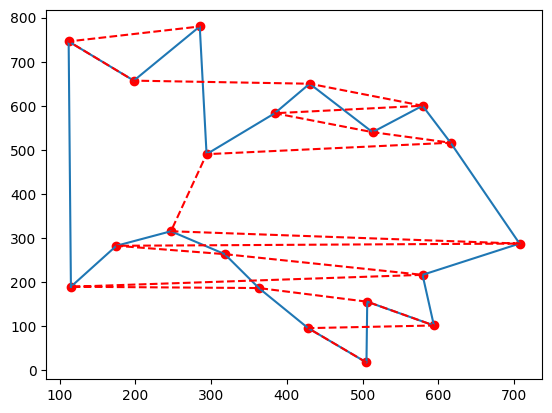

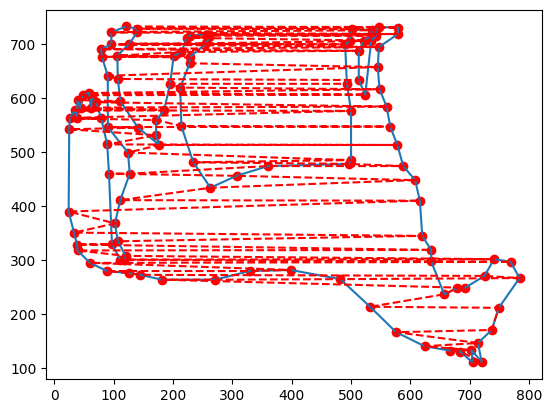

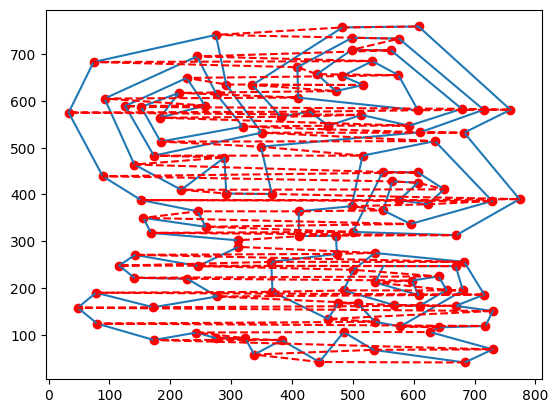

In [48]:
for i in range(len(lista_poligonos)):
    lista_poligonos[i].dibujar_envolvente_graham()